In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/Yogesh Dhumal/Downloads/ecological_health_dataset.csv')
df.head()

,Timestamp,PM2.5,Temperature,Humidity,Soil_Moisture,Biodiversity_Index,Nutrient_Level,Water_Quality,Air_Quality_Index,Pollution_Level,Soil_pH,Dissolved_Oxygen,Chemical_Oxygen_Demand,Biochemical_Oxygen_Demand,Total_Dissolved_Solids,Ecological_Health_Label
0,2018-01-01 00:00:00,119.683969,21.885828,53.955603,22.479784,9,50,0,82.594928,Low,5.284388,6.555422,24.119729,9.731336,44.794055,Ecologically Healthy
1,2018-01-01 01:00:00,74.723237,19.079564,54.298952,23.980314,9,0,0,127.418484,Moderate,6.107887,7.542608,164.584956,178.793602,205.787018,Ecologically Stable
2,2018-01-01 02:00:00,69.114179,26.675869,98.991222,11.566319,7,50,0,95.215419,Low,8.361576,6.821085,24.818366,25.332886,448.386758,Ecologically Healthy
3,2018-01-01 03:00:00,69.115115,20.170066,36.416460,36.144569,10,0,0,65.534270,Low,7.929766,7.421999,248.727880,58.940128,359.259383,Ecologically Healthy
4,2018-01-01 04:00:00,232.485721,21.915745,79.355625,43.532541,11,0,1,80.314956,Low,5.378418,7.231868,271.062338,106.113663,118.303660,Ecologically Critical


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61345 entries, 0 to 61344
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  61345 non-null  object 
 1   PM2.5                      61345 non-null  float64
 2   Temperature                61345 non-null  float64
 3   Humidity                   61345 non-null  float64
 4   Soil_Moisture              61345 non-null  float64
 5   Biodiversity_Index         61345 non-null  int64  
 6   Nutrient_Level             61345 non-null  int64  
 7   Water_Quality              61345 non-null  int64  
 8   Air_Quality_Index          61345 non-null  float64
 9   Pollution_Level            61345 non-null  object 
 10  Soil_pH                    61345 non-null  float64
 11  Dissolved_Oxygen           61345 non-null  float64
 12  Chemical_Oxygen_Demand     61345 non-null  float64
 13  Biochemical_Oxygen_Demand  61345 non-null  flo

In [4]:
# Create dummy variables
df_dummies = pd.get_dummies(df['Pollution_Level'], prefix='Pollution_Level')
df_dummies = pd.get_dummies(df['Ecological_Health_Label'], prefix='Ecological_Health_Label')

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, df_dummies], axis=1)


In [5]:
df["Ecological_Health_Label"].unique()

array(['Ecologically Healthy', 'Ecologically Stable',
       'Ecologically Critical', 'Ecologically Degraded'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the target variable
df['Ecological_Health_Label_encoded'] = label_encoder.fit_transform(df['Ecological_Health_Label'])



In [7]:
df = df.drop(['Pollution_Level', 'Timestamp'], axis=1)

C:\Users\Yogesh Dhumal\AppData\Local\Temp\ipykernel_84076\3086645809.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())
C:\Users\Yogesh Dhumal\AppData\Local\Temp\ipykernel_84076\3086645809.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


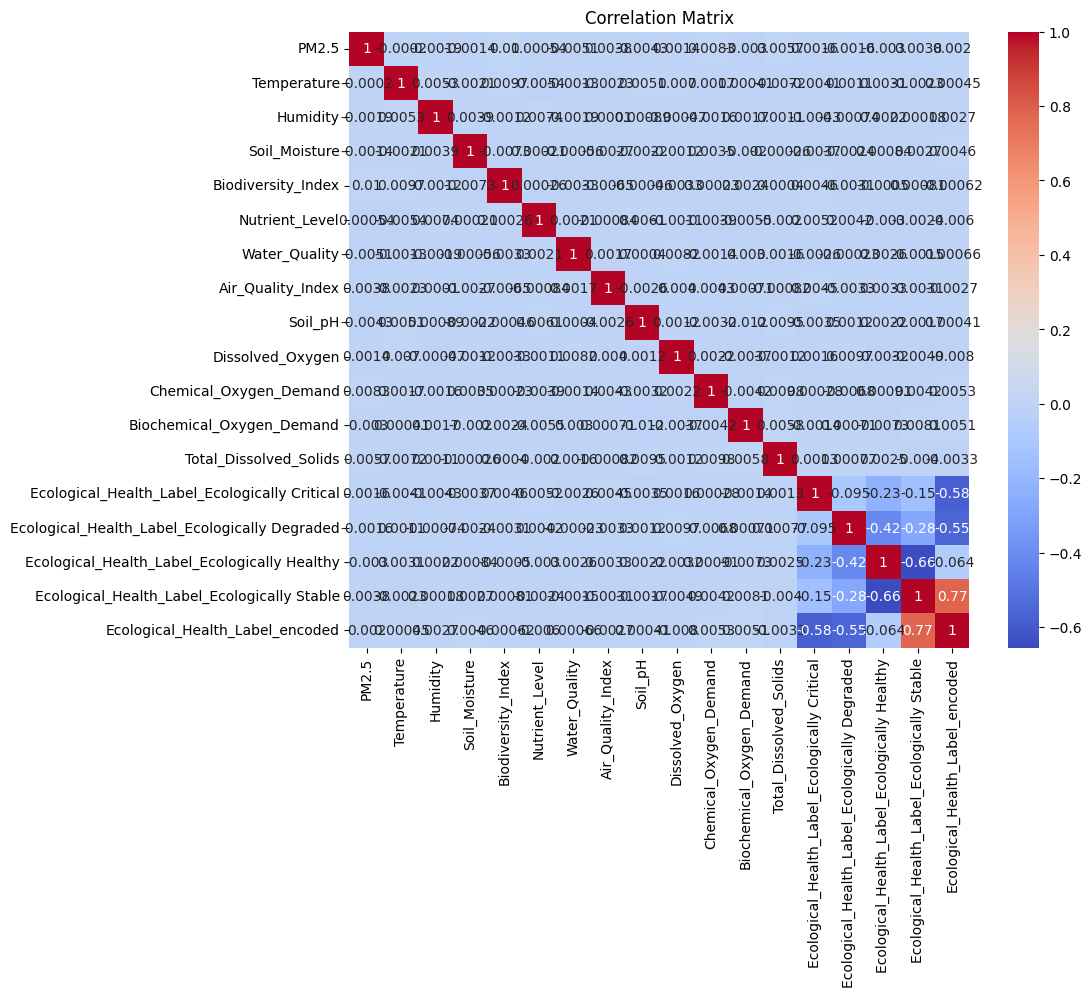

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with null values

# Handle null values (e.g., imputation)
df = df.fillna(df.mean())

# Create a correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
#!pip install dataprep
from dataprep.eda import create_report
from dataprep.eda import create_report
# Create the EDA report
report = create_report(df)
report.save('Ecological_Health _EDA_report_2.html')

  0%|                                                                                         | 0/2919 [00:00<…

C:\Users\Yogesh Dhumal\AppData\Roaming\Python\Python39\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
E-1019 (DUPLICATE_FACTORS): FactorRange must specify a unique list of categorical factors for an axis: duplicate factors found: 'Ecological_He...ded'


Report has been saved to Ecological_Health _EDA_report_2.html!


In [10]:

# Assuming `df` is your DataFrame and includes 'Ecological_Health_Label' and other numeric columns
correlation_matrix = df.corr()

# Extract correlation values for 'Ecological_Health_Label'
target_correlation = correlation_matrix['Ecological_Health_Label_encoded']

# Sort correlations in ascending order
sorted_correlation = target_correlation.sort_values()
print(sorted_correlation)


Ecological_Health_Label_Ecologically Critical   -0.579073
Ecological_Health_Label_Ecologically Degraded   -0.552685
Ecological_Health_Label_Ecologically Healthy    -0.064071
Dissolved_Oxygen                                -0.008044
Nutrient_Level                                  -0.006048
Total_Dissolved_Solids                          -0.003325
Air_Quality_Index                               -0.002730
Biodiversity_Index                              -0.000623
Soil_pH                                          0.000408
Temperature                                      0.000447
Water_Quality                                    0.000662
PM2.5                                            0.002034
Humidity                                         0.002738
Soil_Moisture                                    0.004588
Biochemical_Oxygen_Demand                        0.005051
Chemical_Oxygen_Demand                           0.005256
Ecological_Health_Label_Ecologically Stable      0.773901
Ecological_Hea

C:\Users\Yogesh Dhumal\AppData\Local\Temp\ipykernel_84076\242772139.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [11]:
df

,PM2.5,Temperature,Humidity,Soil_Moisture,Biodiversity_Index,Nutrient_Level,Water_Quality,Air_Quality_Index,Soil_pH,Dissolved_Oxygen,Chemical_Oxygen_Demand,Biochemical_Oxygen_Demand,Total_Dissolved_Solids,Ecological_Health_Label,Ecological_Health_Label_Ecologically Critical,Ecological_Health_Label_Ecologically Degraded,Ecological_Health_Label_Ecologically Healthy,Ecological_Health_Label_Ecologically Stable,Ecological_Health_Label_encoded
0,119.683969,21.885828,53.955603,22.479784,9,50,0,82.594928,5.284388,6.555422,24.119729,9.731336,44.794055,Ecologically Healthy,0,0,1,0,2
1,74.723237,19.079564,54.298952,23.980314,9,0,0,127.418484,6.107887,7.542608,164.584956,178.793602,205.787018,Ecologically Stable,0,0,0,1,3
2,69.114179,26.675869,98.991222,11.566319,7,50,0,95.215419,8.361576,6.821085,24.818366,25.332886,448.386758,Ecologically Healthy,0,0,1,0,2
3,69.115115,20.170066,36.416460,36.144569,10,0,0,65.534270,7.929766,7.421999,248.727880,58.940128,359.259383,Ecologically Healthy,0,0,1,0,2
4,232.485721,21.915745,79.355625,43.532541,11,0,1,80.314956,5.378418,7.231868,271.062338,106.113663,118.303660,Ecologically Critical,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61340,150.831621,25.558820,92.079597,36.778135,10,0,0,130.619988,7.385191,6.142545,237.069041,123.577564,225.114823,Ecologically Stable,0,0,0,1,3
61341,79.456734,20.095047,54.459010,26.948375,13,100,1,85.274996,6.078366,7.801512,39.534996,53.615579,411.410174,Ecologically Healthy,0,0,1,0,2
61342,67.571813,17.808073,60.274315,18.355044,11,0,1,71.687941,6.128054,6.393934,206.409989,143.262422,432.306979,Ecologically Stable,0,0,0,1,3
61343,183.435057,4.116322,56.941051,11.879829,20,0,1,116.221794,5.973359,8.251325,280.801542,34.734395,435.637299,Ecologically Healthy,0,0,1,0,2
